In [4]:
import pandas as pd

# 파일 경로
file_path = "C:/Users/cysy0/Desktop/programmers/work/a_final_project/hits/hits_preprocessing_compressed.csv"

df = pd.read_csv(file_path)

# 3. 데이터 추출 및 가공

## 3.1 각 단계별 이용자(session) 수 집계

In [21]:
df[df['hits'] >= 100][['session','actionTypePath']].head(10)

,session,actionTypePath
836641,2315434531492568643_1472466383,0(34) > 1(1) > 2(1) > 1(1) > 0(71)
836642,0578848656723926834_1471438577,0(108)
836643,3447506485469510326_1481874224,0(108)
836644,3391371207605838551_1483240868,0(22) > 2(1) > 1(1) > 3(2) > 0(9) > 1(1) > 2(1...
836645,4316919564102086136_1470972059,0(36) > 1(1) > 2(1) > 0(70)
836646,2144445028737486275_1485251370,0(108)
836647,8953055789216462710_1471784782,0(108)
836648,6773744630323309395_1500846766,0(22) > 1(1) > 2(1) > 3(1) > 0(12) > 1(1) > 2(...
836649,5208937953046059083_1481036730,0(108)
836650,6332726888827801827_1477597060,0(108)


In [25]:
# 퍼널 단계 정의
step1_explore = df.loc[df['maxActionType'] == 0, 'session'].nunique()
step2_click = df.loc[df['maxActionType'].isin([1, 2]), 'session'].nunique()
step3_cart = df.loc[df['maxActionType'].isin([3, 4]), 'session'].nunique()
step4_checkout = df.loc[df['maxActionType'] == 5, 'session'].nunique()
step5_complete = df.loc[df['maxActionType'] == 6, 'session'].nunique()

# 결과 출력
print(f"1단계(0)-방문 및 탐색: {step1_explore}명")
print(f"2단계(1,2)-상세 페이지 조회: {step2_click}명")
print(f"3단계(3,4)-장바구니 추가: {step3_cart}명")
print(f"4단계(5)-결제 진행: {step4_checkout}명")
print(f"5단계(6)-구매 완료: {step5_complete}명")


1단계(0)-방문 및 탐색: 769607명
2단계(1,2)-상세 페이지 조회: 79141명
3단계(3,4)-장바구니 추가: 31614명
4단계(5)-결제 진행: 10842명
5단계(6)-구매 완료: 11551명


In [23]:
df['maxActionType'].value_counts()

maxActionType
0    769607
2     78892
3     26762
6     11551
5     10842
4      4852
1       249
Name: count, dtype: int64

In [28]:
target_values = ['5.1', '5.2', '5.3', '6']

# actionTypePath에 target_values 중 하나라도 포함된 행 추출
df[df['actionTypePath'].str.contains('|'.join(target_values), na=False)].head()

,session,converted,dates,visitStartTime,channelGrouping,visitNumber,hits,pageviews,timeOnSite,newVisits,...,pageTitlePath,eventActionPath,eventLabelPath,hitTimeSpentPath,productSummaryPath,promotionSummaryPath,actionTypePath,maxActionType,socialNetwork,contentGroupPath
41026,3073078568683703817_1492455965,0,20170417,1492455965,Direct,1,1,1.0,NaN,1.0,...,Checkout Your Information(1),nan(1),nan(1),nan(1),1.YouTube Men's Short Sleeve Hero Tee Black | ...,1.NA | 2.NA | 3.NA | 4.NA(1),5.1(1),5,(not set),(not set) / (not set) / (not set)(1)
65982,5590925533421505689_1477450661,0,20161025,1477450661,Organic Search,2,1,1.0,NaN,NaN,...,Payment Method(1),nan(1),nan(1),nan(1),1.Google Sunglasses | 2.0 | 3.(not set) | 4.NA...,1.NA | 2.NA | 3.NA | 4.NA(1),5.2(1),5,(not set),(not set) / (not set) / (not set)(1)
229150,6673624137905539505_1487086702,0,20170214,1487086702,Direct,3,2,2.0,654.0,NaN,...,Shopping Cart(1) > Checkout Your Information(1),NA(2),NA(2),653.81(1),1.NA | 2.NA | 3.NA | 4.NA | 5.NA | 6.NA | 7.NA...,1.NA | 2.NA | 3.NA | 4.NA(2),0(1) > 5.1(1),5,(not set),(not set) / (not set) / (not set)(2)
246925,9833431631650180427_1471125943,0,20160813,1471125943,Direct,1,2,1.0,NaN,1.0,...,Checkout Your Information(2),NA(2),NA(2),0(1),1.Google Laptop and Cell Phone Stickers | 2.0 ...,1.NA | 2.NA | 3.NA | 4.NA(2),5.1(2),5,(not set),(not set) / (not set) / (not set)(2)
247357,5948801592119806757_1481664004,0,20161213,1481664004,Organic Search,2,2,2.0,16.0,NaN,...,The Google Merchandise Store - Log In(1) > Pay...,NA(2),NA(2),16.06(1),1.NA | 2.NA | 3.NA | 4.NA | 5.NA | 6.NA | 7.NA...,1.NA | 2.NA | 3.NA | 4.NA(2),0(1) > 5.2(1),5,(not set),(not set) / (not set) / (not set)(2)


In [29]:
target_values = ['6']

# actionTypePath에 target_values 중 하나라도 포함된 행 추출
df[df['actionTypePath'].str.contains('|'.join(target_values), na=False)].head()

,session,converted,dates,visitStartTime,channelGrouping,visitNumber,hits,pageviews,timeOnSite,newVisits,...,pageTitlePath,eventActionPath,eventLabelPath,hitTimeSpentPath,productSummaryPath,promotionSummaryPath,actionTypePath,maxActionType,socialNetwork,contentGroupPath
279316,1973770164859106217_1499279973,1,20170705,1499279973,Organic Search,2,3,3.0,64.0,NaN,...,Return Policy(1) > Checkout Confirmation(2),NA(3),NA(3),63.58(1) > 0.01(1),1.NA | 2.NA | 3.NA | 4.NA | 5.NA | 6.NA | 7.NA...,1.NA | 2.NA | 3.NA | 4.NA(3),0(1) > 6(2),6,(not set),(not set) / (not set) / (not set)(3)
282236,186231215995844689_1501525374,1,20170731,1501525374,Referral,3,4,4.0,96.0,NaN,...,Payment Method(1) > Checkout Review(1) > Check...,NA(4),NA(4),57.77(1) > 38.69(1) > 0.03(1),1.Google Men's Bike Short Sleeve Tee Charcoal ...,1.NA | 2.NA | 3.NA | 4.NA(4),5.2(1) > 5.3(1) > 6(2),6,(not set),(not set) / (not set) / (not set)(4)
282745,9383567792856137029_1497665011,1,20170616,1497665011,Organic Search,2,4,4.0,382.0,NaN,...,Google Online Store(1) > Checkout Review(1) > ...,NA(4),NA(4),168.86(1) > 212.99(1) > 0.01(1),1.NA | 2.NA | 3.NA | 4.NA | 5.NA | 6.NA | 7.NA...,1.NA | 2.NA | 3.NA | 4.NA(4),0(1) > 5.3(1) > 6(2),6,(not set),(not set) / (not set) / (not set)(4)
284626,7822178141511453911_1492903531,1,20170422,1492903531,Referral,4,4,4.0,36.0,NaN,...,Checkout Confirmation(4),NA(4),NA(4),0(1) > 35.86(1) > 0.01(1),1.Spiral Notebook and Pen Set | 2.0 | 3.(not s...,1.NA | 2.NA | 3.NA | 4.NA(4),6(4),6,(not set),(not set) / (not set) / (not set)(4)
285063,2801499422088453532_1489136757,1,20170310,1489136757,Organic Search,9,4,2.0,139.0,NaN,...,Mugs & Cups | Drinkware | Google Merchandise S...,NA(4),NA(4),0(2) > 139.44(1),1.Engraved Ceramic Google Mug | 2.1 | 3.Catego...,1.NA | 2.NA | 3.NA | 4.NA(4),0(3) > 6(1),6,(not set),(not set) / Drinkware / (not set)(4)


## 3.2 단계 전환율 계산

In [31]:
# 퍼널 단계 매핑
def map_funnel_stage(x):
    if x == 0:
        return 'Stage 1'
    elif x in [1, 2]:
        return 'Stage 2'
    elif x in [3, 4]:
        return 'Stage 3'
    elif x == 5:
        return 'Stage 4'
    elif x == 6:
        return 'Stage 5'
    else:
        return 'Other'
    
# 퍼널 단계 컬럼 추가
df['funnel_stage'] = df['maxActionType'].apply(map_funnel_stage)

# 각 퍼널 단계별 이용자 수 집계
stage_counts = df['funnel_stage'].value_counts().reindex(
    ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5']
)

# 전환율 계산
conversion_rates = stage_counts.shift(-1) / stage_counts * 100

# 결과 정리
funnel_summary = pd.DataFrame({
    'Users': stage_counts,
    'Next Stage Users': stage_counts.shift(-1),
    'Conversion Rate (%)': conversion_rates.round(2)
})

funnel_summary

,Users,Next Stage Users,Conversion Rate (%)
funnel_stage,,,
Stage 1,769607,79141.0,10.28
Stage 2,79141,31614.0,39.95
Stage 3,31614,10842.0,34.29
Stage 4,10842,11551.0,106.54
Stage 5,11551,NaN,NaN


In [42]:
((df['converted'] == 1).sum() / len(df)) * 100

np.float64(1.2795276680827024)

## 3.3 사용자별 히트 발생 순서 및 단계 전환 여부 판단 

In [ ]:
import re

# 1. actionTypePath를 순서대로 분리
def extract_action_sequence(path):
    # '숫자(숫자)' 패턴에서 앞의 숫자만 가져오기
    actions = re.findall(r'(\d+)\(\d+\)', path)
    return actions

# 컬럼 추가
df['action_sequence'] = df['actionTypePath'].apply(extract_action_sequence)

# 2. 사용자별(세션별) 현재 액션과 다음 액션 구하기
def create_transition_df(row):
    session_id = row['session']
    actions = row['action_sequence']
    transitions = []
    for i in range(len(actions) - 1):
        transitions.append({
            'session': session_id,
            'current_action': actions[i],
            'next_action': actions[i+1]
        })
    return pd.DataFrame(transitions)

# 모든 세션에 대해 transition 테이블 만들기
transition_df_list = df.apply(create_transition_df, axis=1)
transitions_df = pd.concat(transition_df_list.values, ignore_index=True)

# 3. 퍼널 전환 판단하기 (예시: 0→1, 1→2, 2→3 이런 규칙 적용)
def check_conversion(current, next_action):
    if current == '0' and next_action == '1':
        return '전환됨'
    elif current == '1' and next_action == '2':
        return '전환됨'
    elif current == '2' and next_action == '3':
        return '전환됨'
    elif current == '3' and next_action == '4':
        return '전환됨'
    elif current == '4' and next_action == '5':
        return '전환됨'
    else:
        return '전환 실패'

transitions_df['conversion_status'] = transitions_df.apply(
    lambda row: check_conversion(row['current_action'], row['next_action']),
    axis=1
)

# 최종 결과
print(transitions_df)


                                session current_action next_action  \
0        2994779313411060498_1485443293              1           2   
1        6528305531849384385_1497967043              4           0   
2        7053347914091561295_1491771478              2           1   
3        3847424392029075198_1479303819              2           1   
4        1778829308736263765_1470244365              1           2   
...                                 ...            ...         ...   
1231321  0979536639244706985_1492648128              3           6   
1231322  0979536639244706985_1492648128              6           0   
1231323  0979536639244706985_1492648128              0           1   
1231324  0979536639244706985_1492648128              1           2   
1231325  0979536639244706985_1492648128              2           3   

        conversion_status  
0                     전환됨  
1                   전환 실패  
2                   전환 실패  
3                   전환 실패  
4                  

## 3.4 퍼널 차트 

In [ ]:
pip install matplotlib

SyntaxError: invalid syntax (1493899266.py, line 1)

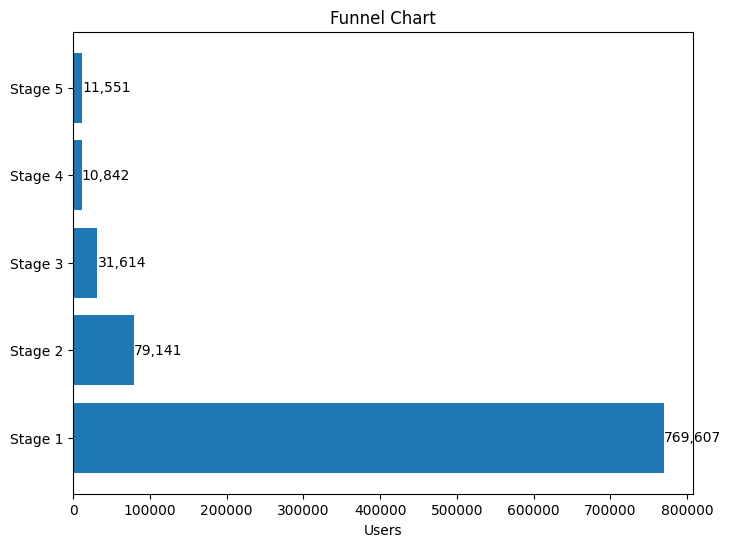

In [34]:
import matplotlib.pyplot as plt

# 퍼널 데이터
stages = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5']
users = [769607, 79141, 31614, 10842, 11551]

# 퍼널 형태로 만들기 위해 역순 정렬 (Stage 1이 위로)
stages = stages[::-1]
users = users[::-1]

# 퍼널 차트 그리기
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(stages, users)

# 숫자 라벨 추가
for i, (stage, user) in enumerate(zip(stages, users)):
    ax.text(user + 500, stage, f'{user:,}', va='center')

ax.set_xlabel('Users')
ax.set_title('Funnel Chart')
plt.gca().invert_yaxis()  # Stage 1이 맨 위로 오게 반전

plt.show()


In [ ]:
!pip install plotly

In [43]:
import plotly.graph_objects as go

# 퍼널 데이터
stages = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5']
users = [769607, 79141, 31614, 10842, 11551]

# 퍼널 차트 그리기
fig = go.Figure(go.Funnel(
    y = stages,
    x = users,
    textinfo = "value+percent previous"
))

fig.update_layout(title='Funnel Chart (Plotly 버전)')

fig.show()


c:\Users\cysy0\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.

c:\Users\cysy0\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.

c:\Users\cysy0\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.

c:\Users\cysy0\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 44852 (\N{HANGUL SYLLABLE GGOL}) missing from font(s) DejaVu Sans.

c:\Users\cysy0\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.

c:\Users\cysy0\AppData\Local\Programs\P

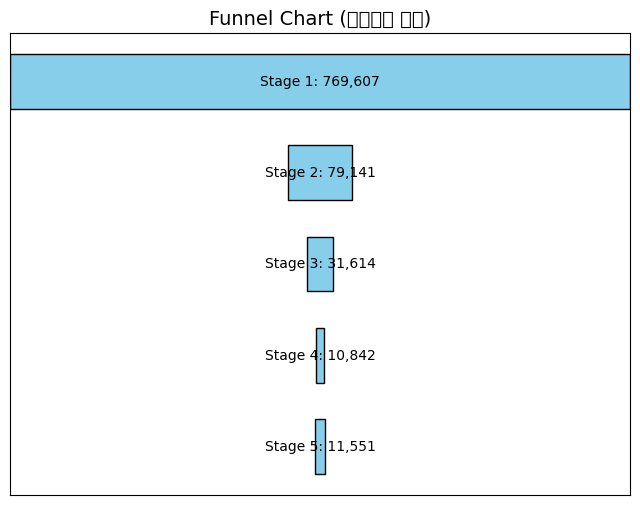

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

'''
커스터마이징 가능
'''

# 퍼널 데이터
stages = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5']
users = [769607, 79141, 31614, 10842, 11551]

# 비율로 변환 (가장 큰 Stage를 100%로 맞추기)
max_users = max(users)
widths = [user / max_users for user in users]

# 단계 수
n_stages = len(stages)

# 차트 그리기
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_stages):
    left = (1 - widths[i]) / 2  # 중앙 정렬
    ax.barh(y=i, width=widths[i], height=0.6, left=left, color='skyblue', edgecolor='black')

    # 단계명과 수치 표시
    ax.text(0.5, i, f'{stages[i]}: {users[i]:,}', ha='center', va='center', fontsize=10, color='black')

# 축 설정
ax.set_yticks([])
ax.set_xticks([])
ax.invert_yaxis()  # Stage 1이 맨 위로
ax.set_xlim(0, 1)
ax.set_title('Funnel Chart (사다리꼴 형태)', fontsize=14)

plt.show()


# 4. 분석 (지표 계산 및 결과 해석)

## 4.1 단계별 전환율과 이탈율(drop-off) 계산

In [50]:
import pandas as pd

# 데이터 준비
funnel_data = {
    'Stage': [
        '방문 및 탐색 (0)', 
        '상세 페이지 조회 (1,2)', 
        '장바구니 추가 (3,4)', 
        '결제 진행 (5)', 
        '구매 완료 (6)'
    ],
    'Users': [769607, 79141, 31614, 10842, 11551]
}

# funnel_df 생성
funnel_df = pd.DataFrame(funnel_data)

# 다음 단계 사용자 수
funnel_df['Next Stage Users'] = funnel_df['Users'].shift(-1)

# 다음 단계로 진행하는 비율 (전환율)
funnel_df['Conversion Rate (%)'] = (funnel_df['Next Stage Users'] / funnel_df['Users']) * 100

# 이전 단계 대비 이탈자 수
funnel_df['Drop-off Users'] = funnel_df['Users'] - funnel_df['Next Stage Users']

# 이전 단계 대비 이탈자 비율 (이탈율)
funnel_df['Drop-off Rate (%)'] = (funnel_df['Drop-off Users'] / funnel_df['Users']) * 100

# # 병목 구간 판단 (이탈율 50% 초과이면 병목)
# threshold = 50  # 기준 (원하면 조정 가능)
# funnel_df['Bottleneck'] = funnel_df['Drop-off Rate (%)'] > threshold

# 최종 결과
funnel_df


,Stage,Users,Next Stage Users,Conversion Rate (%),Drop-off Users,Drop-off Rate (%)
0,방문 및 탐색 (0),769607,79141.0,10.283300,690466.0,89.716700
1,"상세 페이지 조회 (1,2)",79141,31614.0,39.946425,47527.0,60.053575
2,"장바구니 추가 (3,4)",31614,10842.0,34.294933,20772.0,65.705067
3,결제 진행 (5),10842,11551.0,106.539384,-709.0,-6.539384
4,구매 완료 (6),11551,NaN,NaN,NaN,NaN
